In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn.objects as so

sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=1.5)

save_path = "/mnt/c/Users/Felix Scheffler/Proton Drive/schefflerfelix/My files/Masterarbeit/graphics/"

In [2]:
mistral_ratings = pd.read_csv("../processed_data/cc_mistral_ratings.csv")
chatgpt35_ratings = pd.read_csv("../predicted_data/chatgpt35_with_cc.csv")
llama31_ratings = pd.read_csv("../processed_data/cc_llama31_ratings.csv")

In [3]:
# count the number of occurences of -1 for all three datasets
mistral_neg1 = mistral_ratings[mistral_ratings["rating"] == -1].shape[0]
chatgpt35_neg1 = chatgpt35_ratings[chatgpt35_ratings["rating"] == -1].shape[0]
llama31_neg1 = llama31_ratings[llama31_ratings["rating"] == -1].shape[0]

print(f"Mistral: {mistral_neg1} negative ratings")
print(f"ChatGPT-3.5: {chatgpt35_neg1} negative ratings")
print(f"LLAMA-31: {llama31_neg1} negative ratings")

Mistral: 8397 negative ratings
ChatGPT-3.5: 0 negative ratings
LLAMA-31: 1474 negative ratings


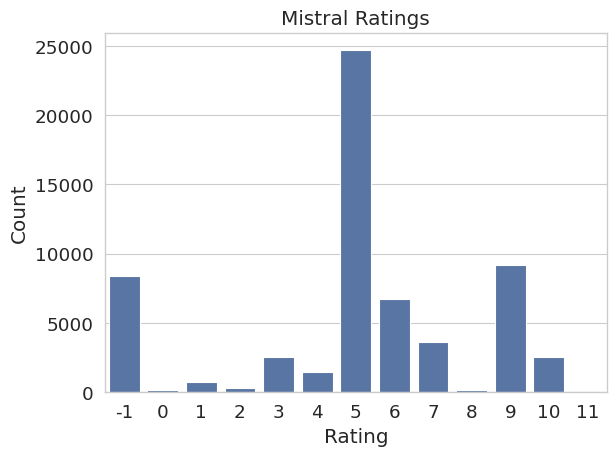

In [14]:
# plot the value counts of the ratings for all three datasets, sort by x axis
mistral_ratings["rating"] = mistral_ratings["rating"].astype(int)

ax = sns.countplot(x="rating", data=mistral_ratings)
ax.set_title("Mistral Ratings")
ax.set_ylabel("Count")
ax.set_xlabel("Rating")


# save the plot
plt.tight_layout()
plt.savefig(save_path + "mistral_ratings_dist.png", dpi=300, bbox_inches="tight")

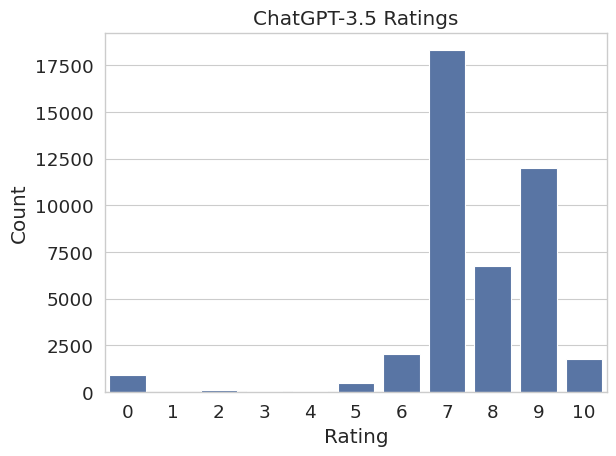

In [12]:
ax = sns.countplot(x="rating", data=chatgpt35_ratings)
ax.set_title("ChatGPT-3.5 Ratings")
ax.set_ylabel("Count")
ax.set_xlabel("Rating")

# save the plot
plt.tight_layout()
plt.savefig(save_path + "chatgpt35_ratings_dist.png", dpi=300, bbox_inches="tight")

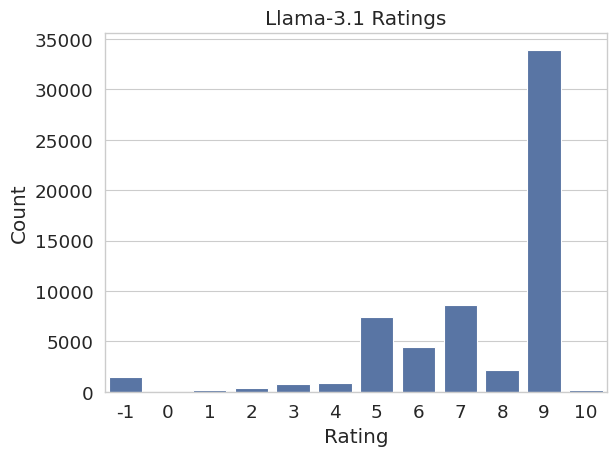

In [15]:
ax = sns.countplot(x="rating", data=llama31_ratings)
ax.set_title("Llama-3.1 Ratings")
ax.set_ylabel("Count")
ax.set_xlabel("Rating")

# save the plot
plt.tight_layout()
plt.savefig(save_path + "llama31_ratings_dist.png", dpi=300, bbox_inches="tight")

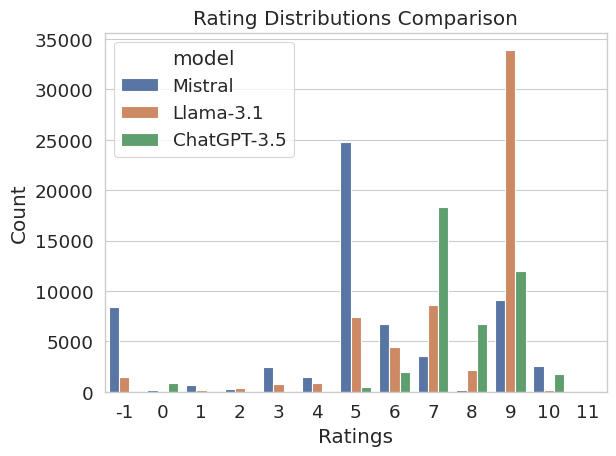

In [23]:
# join the three datasets and plot the rating distributions
ratings = pd.DataFrame(
    {
        "ratings_count": pd.concat(
            [
                mistral_ratings["rating"].value_counts(),
                chatgpt35_ratings["rating"].value_counts(),
                llama31_ratings["rating"].value_counts(),
            ]
        ),
        "model": ["Mistral"] * 12 + ["ChatGPT-3.5"] * 12 + ["Llama-3.1"] * 12,
    }
)


ax = sns.barplot(x="rating", y="ratings_count", hue="model", data=ratings)
ax.set_title("Rating Distributions Comparison")
ax.set_ylabel("Count")
ax.set_xlabel("Ratings")

plt.tight_layout()
plt.savefig(save_path + "ratings_dist_all_models.png", dpi=300, bbox_inches="tight")

In [17]:
edstays = pd.read_csv("../raw_data/edstay_encounters.csv")

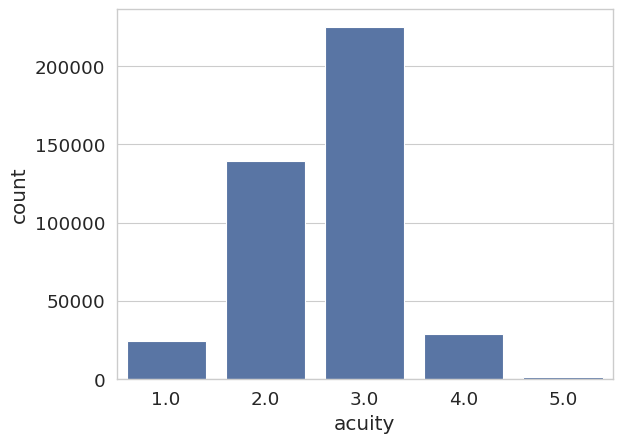

In [18]:
acuity_counts = pd.DataFrame(edstays["acuity"].value_counts())

ax = sns.countplot(x="acuity", data=edstays)

/tmp/ipykernel_1260370/1081027531.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_e["rating"] = 11 - ratings_e.index
/tmp/ipykernel_1260370/1081027531.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_e["rating_bin"] = ratings_e["rating"].apply(


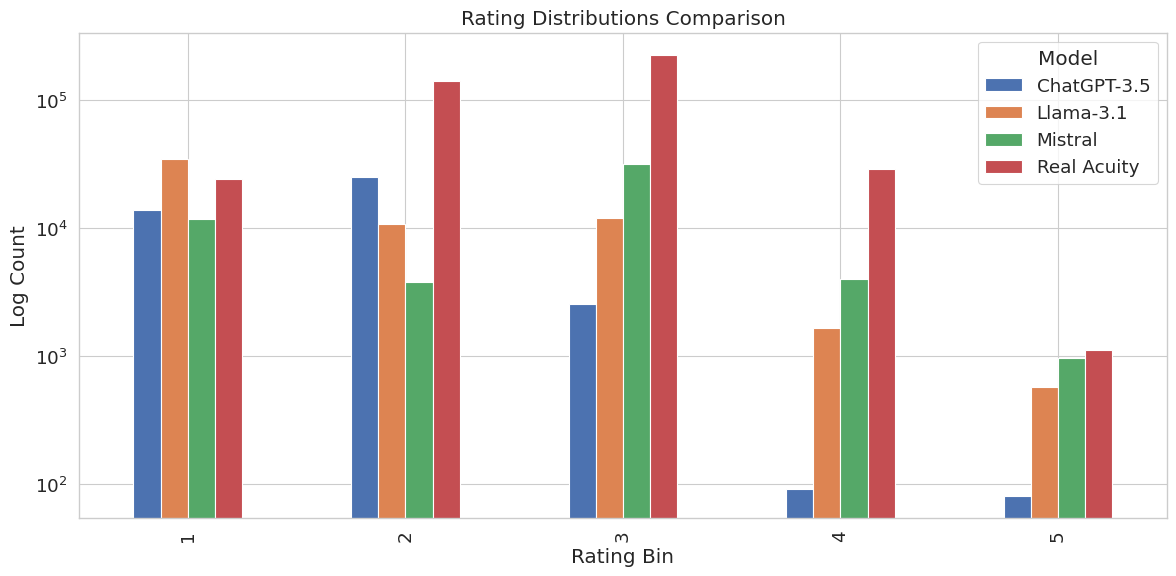

In [26]:
# drop all values from ratings that are not numbers between 1 and 10
ratings_e = ratings[ratings.index.isin([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])]

# invert 1-10 scale to 10-1 scale
ratings_e["rating"] = 11 - ratings_e.index

# bin into 5 bins
ratings_e["rating_bin"] = ratings_e["rating"].apply(
    lambda x: 1 if x < 3 else 2 if x < 5 else 3 if x < 7 else 4 if x < 9 else 5
)

ratings_e = ratings_e.groupby(["rating_bin", "model"]).sum().reset_index()

# get groupby as dataframe
ratings_e = ratings_e.pivot(index="rating_bin", columns="model", values="ratings_count")

# add true data as column
ratings_e["Real Acuity"] = acuity_counts


# plot the data
ax = ratings_e.plot(kind="bar", stacked=False, logy=True, figsize=(12, 6))
ax.set_title("Rating Distributions Comparison")
ax.set_xlabel("Rating Bin")
ax.set_ylabel("Log Count")
ax.legend().set_title("Model")


plt.tight_layout()
plt.savefig(save_path + "ratings_models_vs_reality.png", dpi=300, bbox_inches="tight")

In [134]:
df = pd.read_csv("../processed_data/mistral_full_data.csv")

/tmp/ipykernel_67012/2356323130.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../processed_data/mistral_full_data.csv")


In [142]:
df["llm_info"][6]

" Based on the provided patient data, there are a few irregularities that stand out:\n\n1. The patient's age is 71 years old, which places her in an older adult population with increased risk for various medical conditions.\n2. The patient presented with symptoms of weakness and unsteady gait, suggesting possible neurological or musculoskeletal issues.\n3. Her heart rate is within normal range (60 bpm), but her systolic blood pressure is slightly low for her age (131 mmHg).\n4. The respiratory rate is higher than expected at 16 bpm, indicating potential respiratory distress or compensation for metabolic acidosis.\n5. There is no reported pain level or indication of trauma in the chief complaint.\n\nPossible diagnosis based on these findings could be:\n- Syncope or presyncope due to orthostatic hypotension or other neurological causes, given the weakness and unsteady gait.\n- Transient Ischemic Attack (TIA) or stroke, considering her age and symptoms.\n- Metabolic acidosis causing compe